# Data Analytics I:




Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset   (https://www.kaggle.com/c/boston-housing).The   Boston   Housing   dataset   contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.The objective is to predict the value of prices of the house using the given features.


In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
         
df = pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [2]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.drop('Unnamed: 0',axis='columns', inplace=True)

In [4]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.shape #Check the shape of dataframe

(506, 14)

In [6]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [8]:
df.shape

(506, 14)

In [9]:
df.isnull().sum() # Check for missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
#displaying the data statistics
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [11]:
#this for is use for showin the outiers in perentage
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column black outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


column black has the most numbers of outlier

MEDV - Median value of owner-occupied homes in $1000's  and
RM - average number of rooms per dwelling

In [12]:
df = df[~(df['medv'] >= 50.0)]
print(np.shape(df))

(490, 14)


In [13]:
df.skew()

crim       5.163722
zn         2.241578
indus      0.321800
chas       3.747718
nox        0.753539
rm         0.174716
age       -0.587412
dis        1.003954
rad        1.014220
tax        0.680625
ptratio   -0.823673
black     -2.832125
lstat      0.907299
medv       0.775660
dtype: float64

In [14]:
df["medv"] =  np.log(df["medv"])

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [15]:
# Finding out the correlation
corr = df.corr()
corr.round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.38,0.46,-0.57
zn,-0.20,1.00,-0.53,-0.05,-0.51,0.31,-0.56,0.67,-0.31,-0.30,-0.38,0.18,-0.42,0.38
indus,0.41,-0.53,1.00,0.04,0.77,-0.41,0.64,-0.71,0.60,0.72,0.39,-0.36,0.64,-0.61
chas,-0.06,-0.05,0.04,1.00,0.09,0.04,0.07,-0.08,-0.03,-0.07,-0.12,0.04,-0.01,0.09
nox,0.42,-0.51,0.77,0.09,1.00,-0.32,0.73,-0.77,0.61,0.67,0.19,-0.38,0.61,-0.57
rm,-0.22,0.31,-0.41,0.04,-0.32,1.00,-0.27,0.25,-0.20,-0.28,-0.29,0.12,-0.61,0.61
age,0.35,-0.56,0.64,0.07,0.73,-0.27,1.00,-0.74,0.45,0.50,0.27,-0.28,0.64,-0.52
dis,-0.38,0.67,-0.71,-0.08,-0.77,0.25,-0.74,1.00,-0.49,-0.53,-0.25,0.30,-0.54,0.42
rad,0.63,-0.31,0.60,-0.03,0.61,-0.20,0.45,-0.49,1.00,0.91,0.46,-0.45,0.51,-0.54
tax,0.58,-0.30,0.72,-0.07,0.67,-0.28,0.50,-0.53,0.91,1.00,0.45,-0.45,0.57,-0.62


<AxesSubplot:>

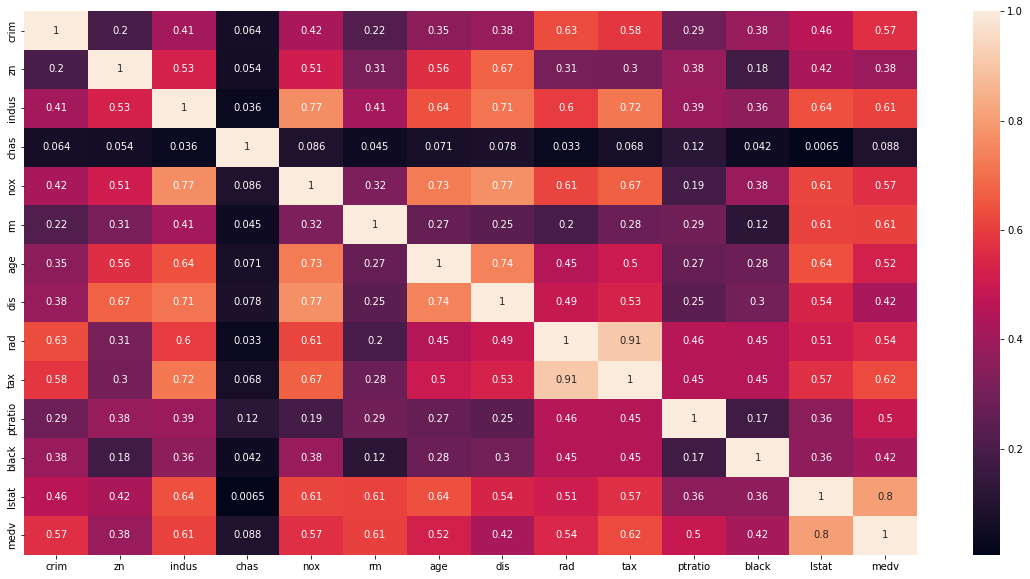

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

# After the correlation statuistic i have found that the greatest correlation value which is near to 1 is "lstat" ao i have slected lstat as predict variable and medv as target variable

In [17]:
x=pd.DataFrame(df['lstat'])#predict variable 
y=pd.DataFrame(df['medv'])#target variable

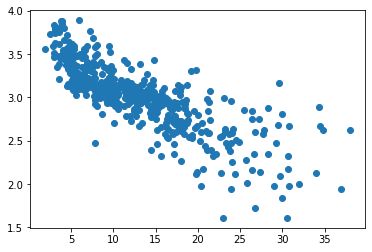

In [18]:
plt.scatter(x,y)
  
# To show the plot

plt.show()

In [19]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)



In [20]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# Value of y intercept
lm.intercept_

array([3.54495301])

In [22]:
lm.coef_

array([[-0.04146394]])

In [23]:
lm.score(X_train, y_train)

0.6375110934647089

In [24]:
# Model prediction on train data
y_pred = lm.predict(X_train)

for line in y_pred:
    print (line,end="\t")

#print(y_pred)

[2.86204187]	[3.31731596]	[2.54318414]	[2.93170129]	[3.11828903]	[2.85457836]	[3.16514329]	[3.36334094]	[3.22982704]	[3.07475189]	[3.16597257]	[2.94662831]	[3.12409399]	[2.11983729]	[2.96487244]	[3.09963026]	[3.12243543]	[2.99970216]	[2.89355446]	[3.23687591]	[2.57718458]	[3.29699863]	[3.38241435]	[3.12575254]	[3.27294954]	[2.51208619]	[3.15602122]	[2.90682292]	[2.70282032]	[3.28414481]	[3.12492326]	[2.88816415]	[2.65513679]	[2.01161639]	[3.35380423]	[3.28746192]	[2.95906749]	[2.86701754]	[3.24682726]	[3.29326687]	[3.31690132]	[3.24060767]	[2.87282249]	[2.76335768]	[2.79569956]	[2.52659857]	[3.22194889]	[2.95823821]	[3.39858529]	[3.34385288]	[3.03370259]	[3.26009572]	[3.02250733]	[3.33887721]	[3.06894694]	[3.35048712]	[3.2882912]	[3.10958161]	[3.06811766]	[3.22443673]	[2.26744892]	[2.99223865]	[2.27532707]	[2.83633422]	[2.81518761]	[3.00592175]	[2.93999408]	[3.27212026]	[2.7961142]	[3.2766813]	[3.14731379]	[3.10709377]	[3.20494868]	[3.15975298]	[2.47559792]	[3.16846041]	[3.23853447]	[3

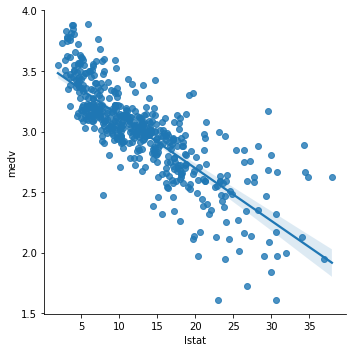

In [25]:
sns.lmplot(x="lstat",y="medv",data=df)

In [26]:
# Model Evaluation
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.16557084464767702
MSE: 0.05087445125300044
RMSE: 0.22555365493159368


MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

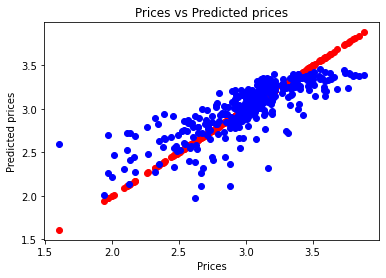

In [27]:
# Visualizing the differences between actual prices and predicted values
x=y_train
plt.scatter(x,y_train, c="red")
plt.scatter(x,y_pred, c="blue")



plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

/home/pict/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


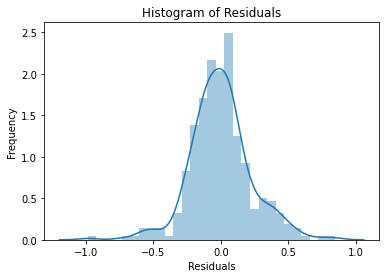

In [28]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()